# NAIVE BAYES CLASSIFIER

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [2]:
# datasets
X_train = pd.read_csv('.\data\csv_data\X_TR_151_SENZA_OUTLIERS.csv')
X_test = pd.read_csv('.\data\csv_data\X_TST_151_SENZA_OUTLIERS.csv')
y_train = pd.read_csv('.\data\csv_data\Y_TR_151_SENZA_OUTLIERS.csv')
y_test = pd.read_csv('.\data\csv_data\y_test.csv')

In [3]:
# Target variable from integer to categorical
y_train['Label'] = pd.Categorical(y_train["Label"])
y_test['Label'] = pd.Categorical(y_test["Label"])

In [4]:
X_train.shape

(7278, 151)

In [5]:
y_train.shape

(7278, 1)

In [6]:
X_test.shape

(2947, 151)

In [7]:
y_test.shape

(2947, 1)

## GAUSSIAN NAIVE BAYES CLASSIFIER

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

 
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       496
           2       0.84      0.93      0.88       471
           3       0.89      0.85      0.87       420
           4       0.94      0.55      0.70       491
           5       0.71      0.92      0.80       532
           6       0.99      1.00      0.99       537

    accuracy                           0.87      2947
   macro avg       0.88      0.86      0.86      2947
weighted avg       0.88      0.87      0.86      2947



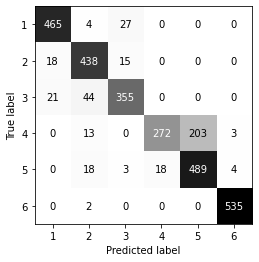

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap='Greys', colorbar=False)

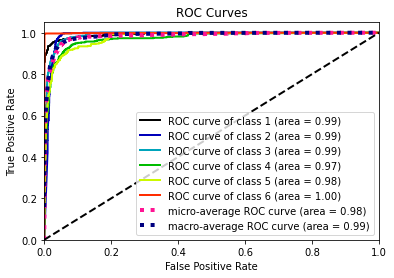

In [11]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

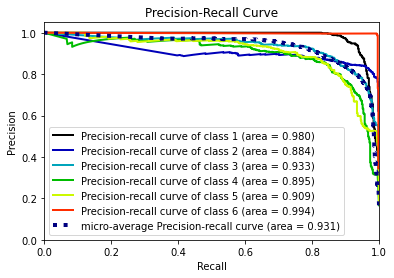

In [12]:
plot_precision_recall(y_test, y_score)
plt.show()

## CATEGORICAL NAIVE BAYES CLASSIFIER

In [13]:
from sklearn.naive_bayes import CategoricalNB

In [18]:
df = pd.concat([X_train, X_test])
df = df.values

In [19]:
# discretizziamo le variabili del dataset per fare poi un Categorical bayes classifier
df_cat = []
for i in range(df.shape[1]):
    df_cat.append(pd.qcut(df[:,i], q=[0.0, 0.25, 0.5, 0.75, 1.0], duplicates = 'drop', labels=False))
df_cat = np.array(df_cat).T

In [20]:
df_cat

array([[3, 1, 0, ..., 2, 1, 1],
       [2, 2, 0, ..., 1, 0, 3],
       [2, 1, 1, ..., 2, 2, 3],
       ...,
       [3, 3, 1, ..., 2, 3, 2],
       [0, 3, 3, ..., 0, 3, 1],
       [0, 1, 0, ..., 0, 3, 1]], dtype=int64)

In [21]:
# ridivisione train e test
X_train_cat = df_cat[:7278,]
X_test_cat = df_cat[7278:,]

In [22]:
df_cat.shape

(10225, 151)

In [23]:
X_train_cat.shape

(7278, 151)

In [24]:
X_test_cat.shape

(2947, 151)

In [32]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train)
y_pred = clf.predict(X_test_cat)

#print('Accuracy %s' % accuracy_score(y_test##_cat, y_pred))
#print('F1-score %s' % f1_score(y_test_cat, y_pred, average=None))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.95      0.97      0.96       496
           2       0.83      0.93      0.88       471
           3       0.90      0.86      0.88       420
           4       0.79      0.68      0.73       491
           5       0.80      0.88      0.84       532
           6       0.94      0.88      0.91       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87      2947



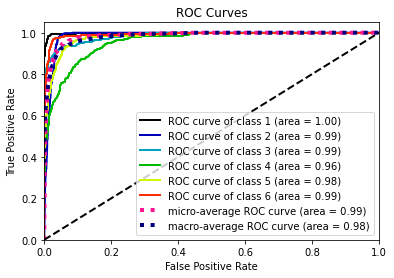

In [30]:
y_score = clf.predict_proba(X_test_cat)
plot_roc(y_test, y_score)
plt.show()

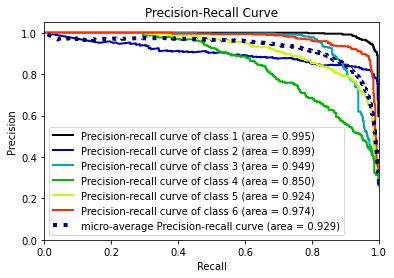

In [31]:
plot_precision_recall(y_test, y_score)
plt.show()